# Global Power Plant Database

Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [1]:
from IPython.display import Image
Image(url="https://media.istockphoto.com/photos/thermal-power-station-picture-id1298098268?b=1&k=20&m=1298098268&s=170667a&w=0&h=6fjfHYlSeQSYXJ3cVb-AUdcMkyyU2z6RX_wGTu_RJg4=")

In [2]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the csv files and listing the datas
df_pow= pd.read_csv(r"C:\Users\Premium\Downloads\database_IND.csv")

In [4]:
df_pow.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


Let check if any whitespace,'?' 'NA' or '-' exist in datase

In [16]:
df_pow.isin([' ','NA','-','?']).sum().any()

False

No whitespace, NA, '-' exist in dataset.

# EXPLORATORY DATA ANALYSIS

In [9]:
df_pow.shape

(907, 27)

The dataset comprises of 907 observations of 27 columns

In [10]:
df_pow.columns # This will print the names of all columns.

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df_pow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [11]:
df_pow.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Checking for Missing Values

In [12]:
df_pow.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [15]:
df_pow.isnull().sum().sum()

10445

there are lot of missing values in the dataset
and Lot of Non relevant data like gppd_idnr,url.
and many more.
Also v can drop country country_long


  first remove empty columns and non relevalent columns.

Columns we are going remove are :

estimated_generation_gwh - Empty

wepp_id - Empty

other_fuel2 - 98% data missing

other_fuel3 - Empty

owner - More than 60 % data missing

year_of_capacity_data - Missing data with single unique value

country - non relevalent info

country_long - non relevalent info

gppd_idnr -non relevalent info

url - No missing value but of no use

In [17]:
df_pow.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [19]:
df_pow.sample(5)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
234,GODAVARI GT,205.24,17.0587,82.3097,Gas,NaN,1997.0,Central Electricity Authority,WRI,NaN,525.099000,535.411000,933.370000,553.615,1110.42,NaN,Central Electricity Authority
106,BSES Kerala CCGT,165.00,10.0740,76.3188,Gas,Oil,1999.0,Central Electricity Authority,WRI,NaN,145.560000,3.417200,0.000000,60.718,0.00,NaN,Central Electricity Authority
22,AURAIYA GT,652.00,26.6282,79.5286,Gas,NaN,1989.0,Central Electricity Authority,WRI,NaN,1607.000000,1465.000000,509.000000,357.000,521.00,NaN,Central Electricity Authority
686,SAMEERWADI MILL,24.00,16.3918,75.0411,Biomass,NaN,NaN,Godavari Mills ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,P.NALLUR CCGT,330.50,11.0749,79.8340,Gas,NaN,2001.0,Central Electricity Authority,WRI,NaN,1142.965769,152.252966,195.884661,0.000,0.00,NaN,Central Electricity Authority


In [20]:
df_pow.isnull().sum().sum()

5865

Now we can see that half of the null values has been reduced.

# Data Visualization

In [21]:
df_pow.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

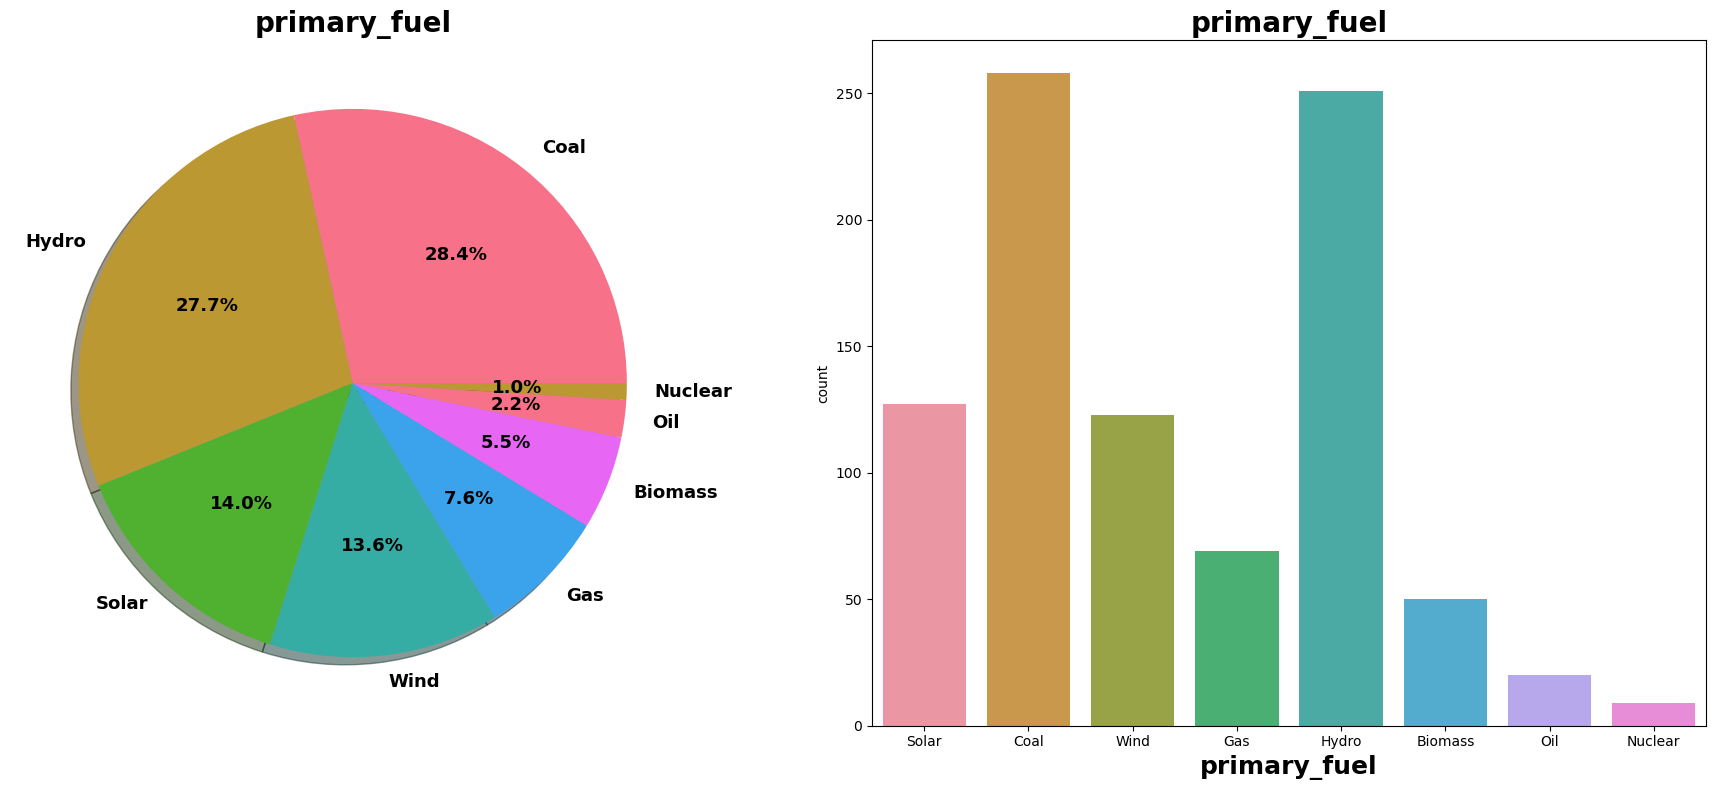

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df_pow['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df_pow,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

Maximum Number of powerplant are coal based powerplant with 28.4%

followed by Hydro energy based powerplants with 27.7%

Solar powerplant around 14%





# Total Power Generation Capacity of Indian Powerplants

In [24]:
df_pow['capacity_mw'].sum()

295884.946

###India's Total Power Generation Capacity is 295884.946 MW.

In [25]:
df_pow["capacity_mw"].groupby(df_pow["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Also We can notice that  Overall Power Generation capacity of Nuclear powerplants is greater than other  Energy sources based powerplant (biomass, wind,solar) combined.

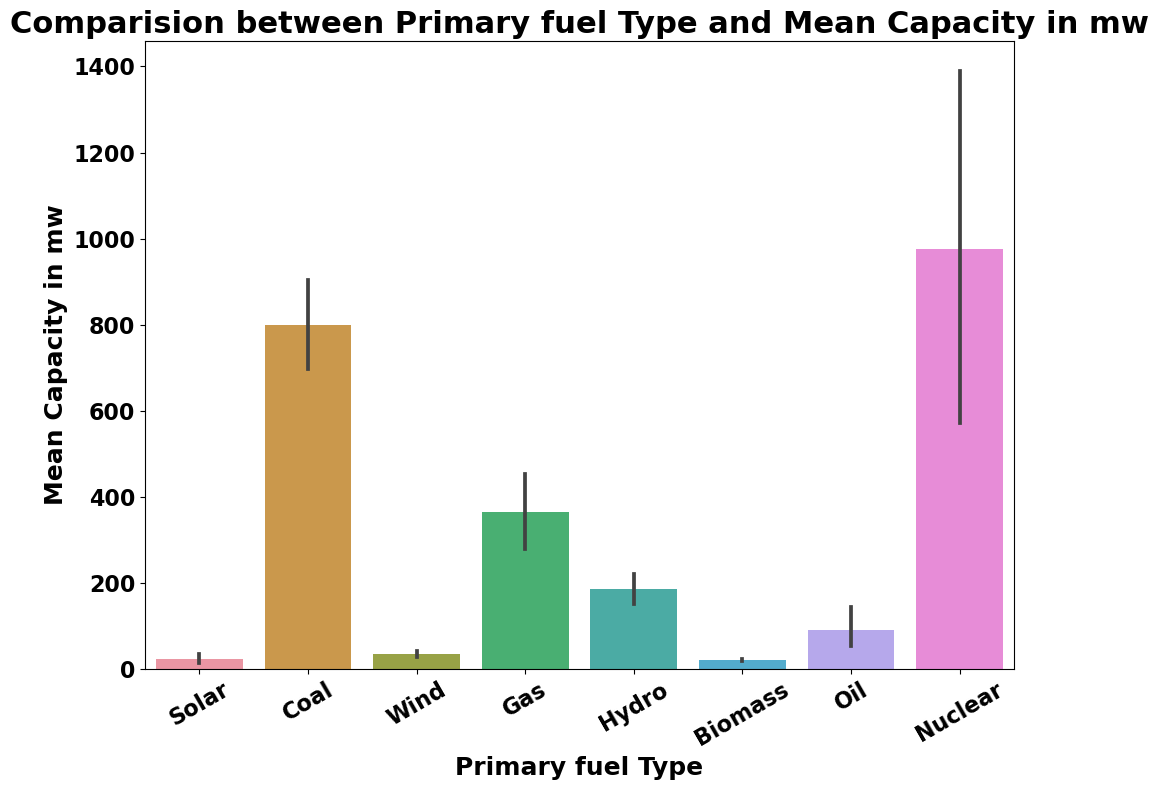

In [26]:
#Lets check the relation between primary_fuel and  Average capacity

plt.figure(figsize = (10,8))
y = df_pow["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df_pow)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

From the graph we can see that Nuclear has high mean  generation reports .

Reason is high efficieny of Nuclear powerplants.

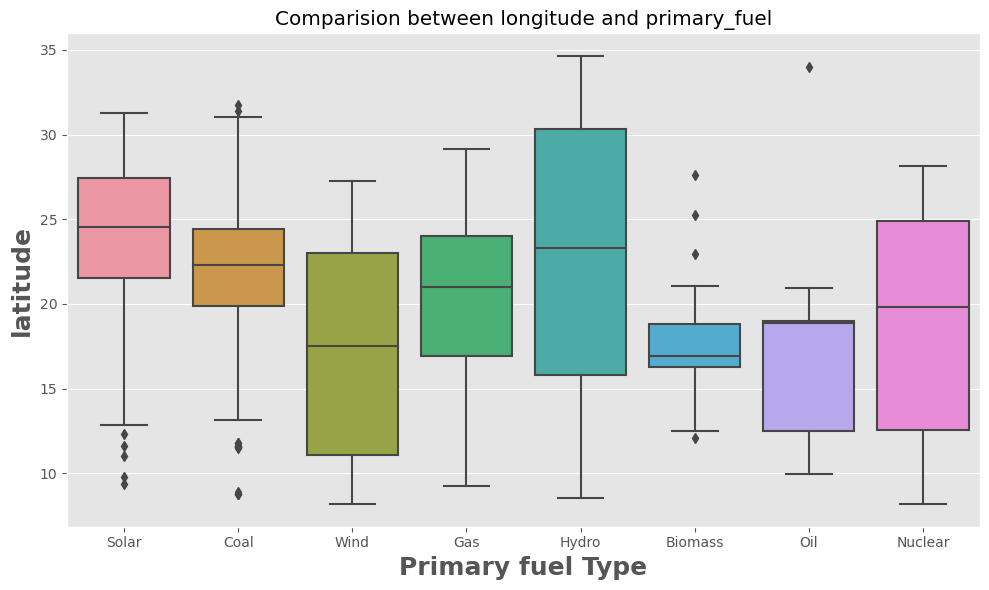

In [28]:
# Let's check how the primary_fuel is reated to Latitude of the power plant

plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df_pow['primary_fuel'],df_pow["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

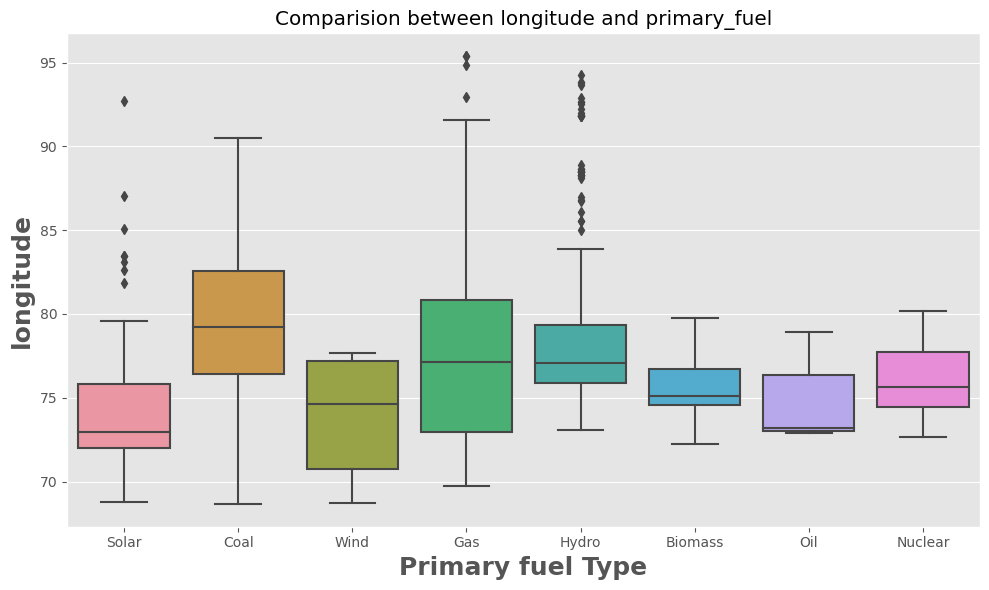

In [29]:
# Let's check how the primary_fuel is reated to longitude of the power plant

plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df_pow['primary_fuel'],df_pow["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')

plt.show()

location is important feature for powerplants scpecially for the nuclear powerplants.

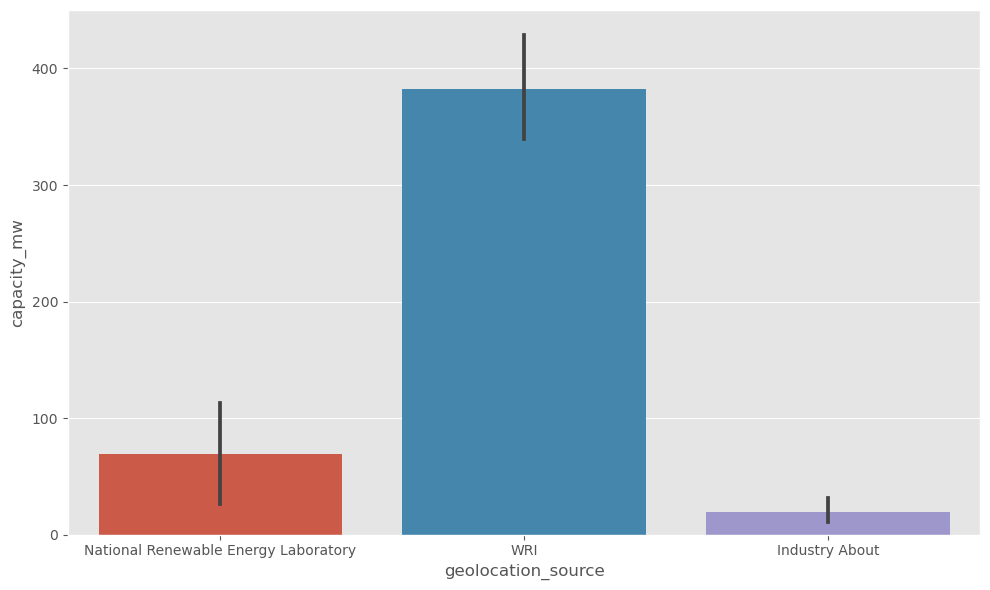

In [31]:
#Lets check the relation between source and capacity

plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df_pow)
plt.show()

# Data Distribution of features

In [35]:
Num=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017']

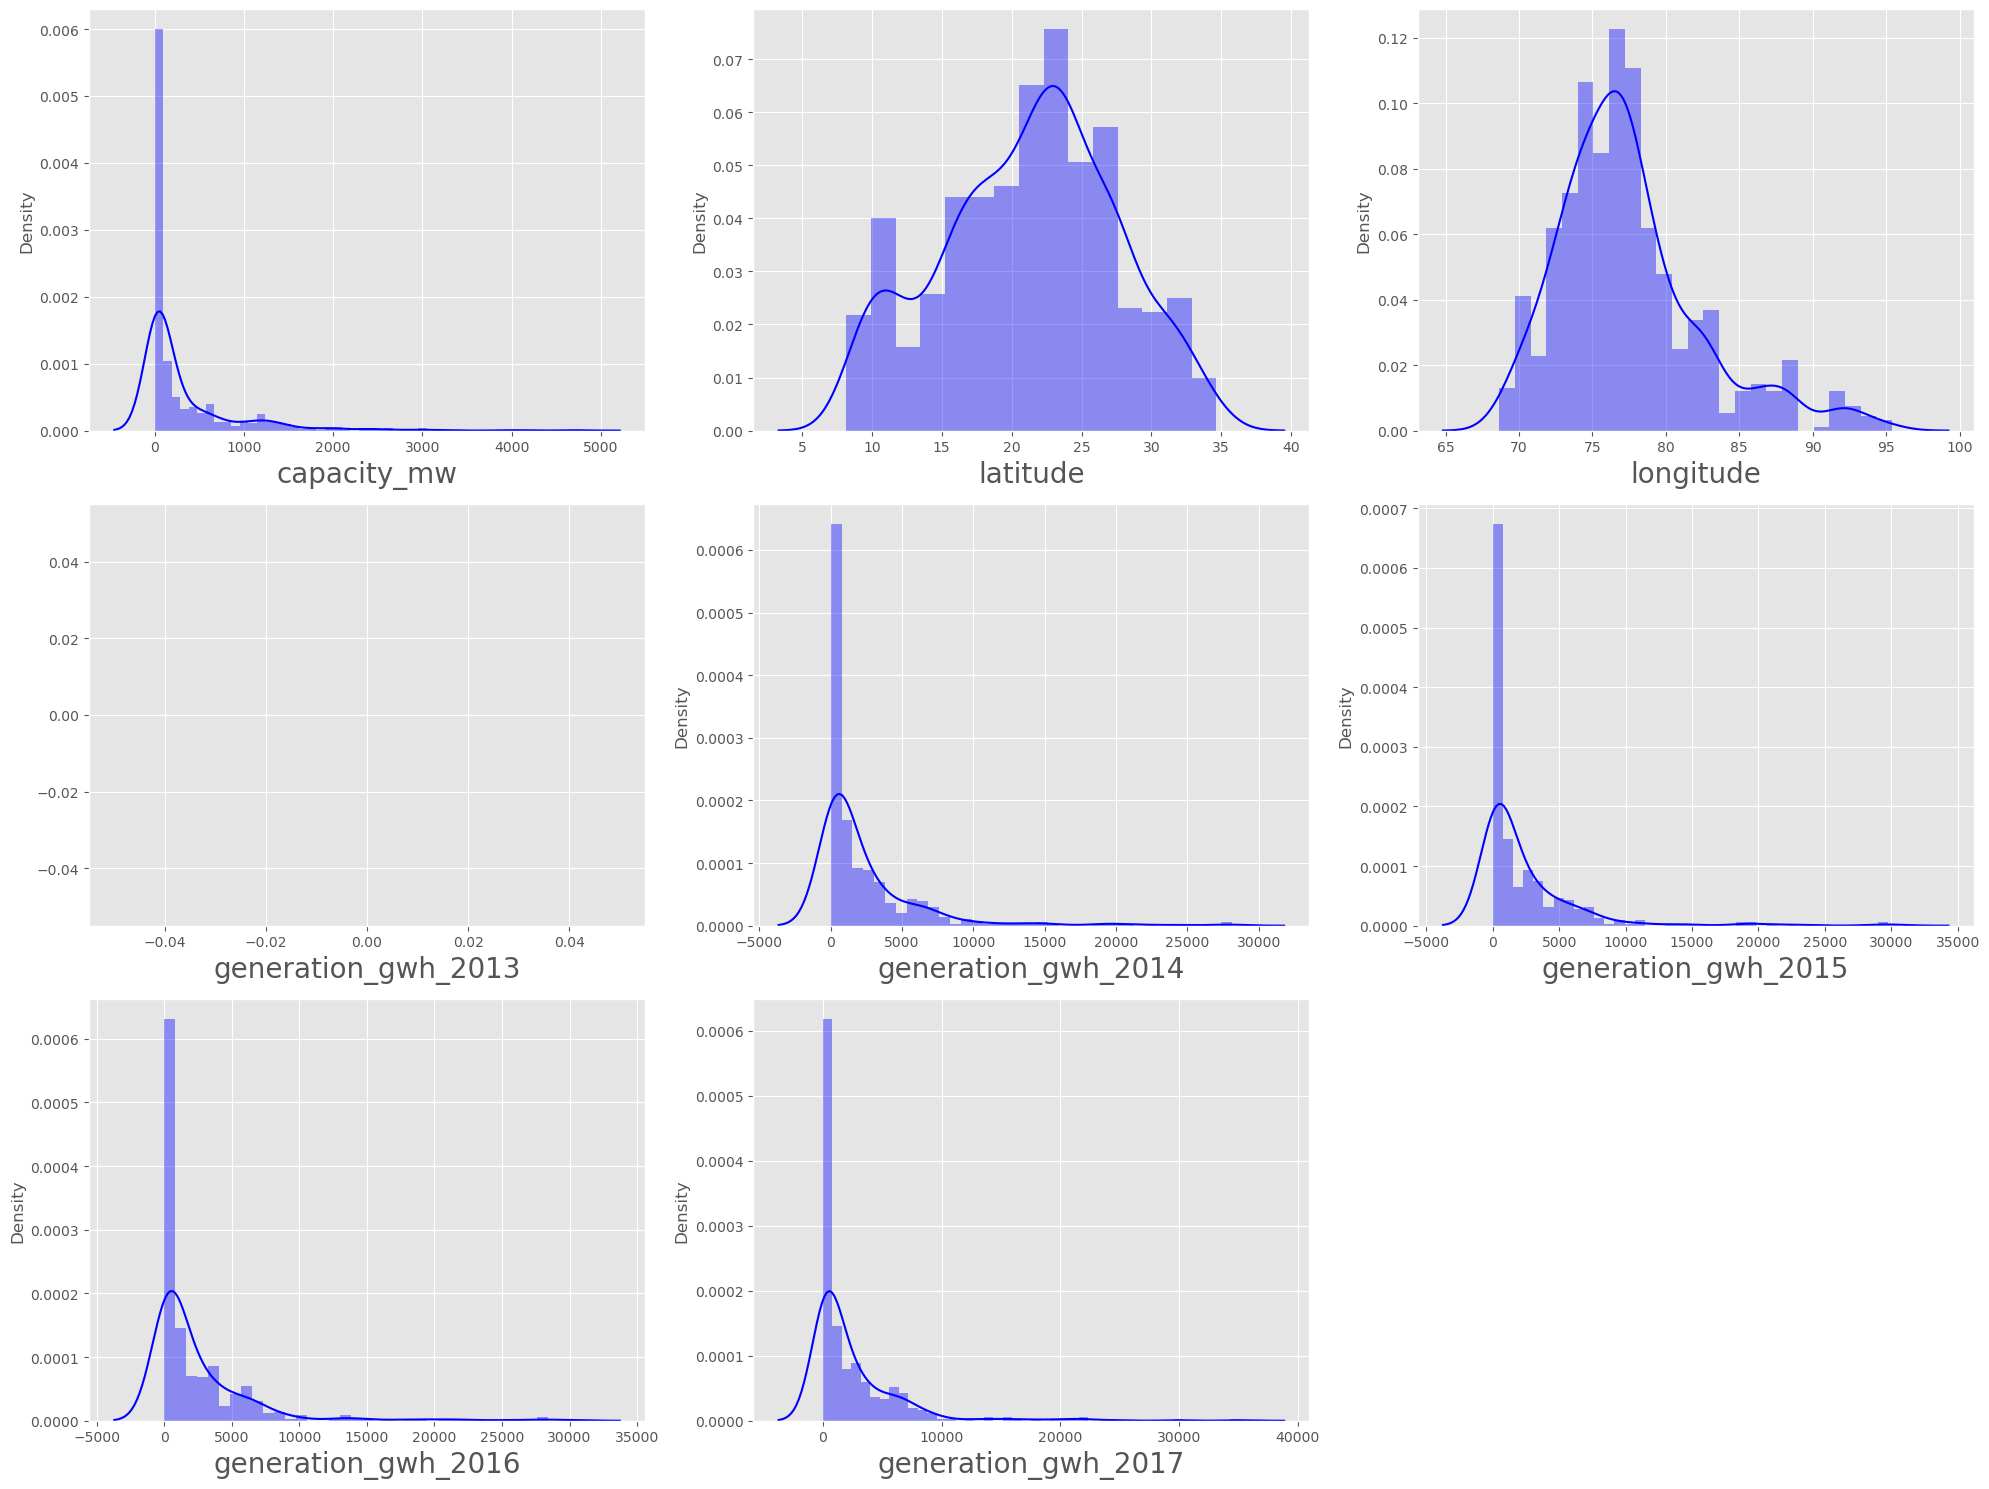

In [36]:
# Checking the data  distribution in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_pow[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

we can observe that the data is not normally distributed in all the columns except latitude and longitude.

In most of the columns the mean is greater than the median which means they are skewed to right

# Encoding categorical data

In [40]:
df_pow.drop(columns=['name'],axis=1,inplace=True) # drpopping the name

In [38]:
df_pow.head(5)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority


In [41]:
df_pow.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [48]:
df_pow.drop(columns=['generation_gwh_2013'],axis=1,inplace=True)

In [49]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [50]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df_pow[i] = le.fit_transform(df_pow[i])
df_pow.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,3,NaN,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,617.789264,843.747,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN


# Correlation matrix

In [51]:
df_pow.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,0.051309,0.197129,-0.380395,-0.606289,0.304087,-0.242122,0.183419,0.839094,0.844352,0.870620,0.886673,0.901918,NaN
latitude,0.051309,1.000000,0.036362,-0.010530,-0.033301,0.129902,0.056528,-0.185045,0.060330,0.048610,0.041387,0.040568,0.040476,NaN
longitude,0.197129,0.036362,1.000000,-0.359060,-0.279985,0.121910,-0.241907,0.253397,0.013511,0.022760,0.050732,0.048678,0.045599,NaN
primary_fuel,-0.380395,-0.010530,-0.359060,1.000000,0.476410,-0.336501,0.053613,-0.420263,-0.405019,-0.393335,-0.408951,-0.421736,-0.421518,NaN
other_fuel1,-0.606289,-0.033301,-0.279985,0.476410,1.000000,-0.359209,0.254138,-0.182347,-0.420870,-0.403869,-0.419541,-0.435230,-0.429803,NaN
commissioning_year,0.304087,0.129902,0.121910,-0.336501,-0.359209,1.000000,0.118460,0.004512,0.160014,0.170363,0.193743,0.191367,0.193694,NaN
source,-0.242122,0.056528,-0.241907,0.053613,0.254138,0.118460,1.000000,-0.491984,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_source,0.183419,-0.185045,0.253397,-0.420263,-0.182347,0.004512,-0.491984,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,0.060330,0.013511,-0.405019,-0.420870,0.160014,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,NaN
generation_gwh_2015,0.844352,0.048610,0.022760,-0.393335,-0.403869,0.170363,NaN,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,NaN


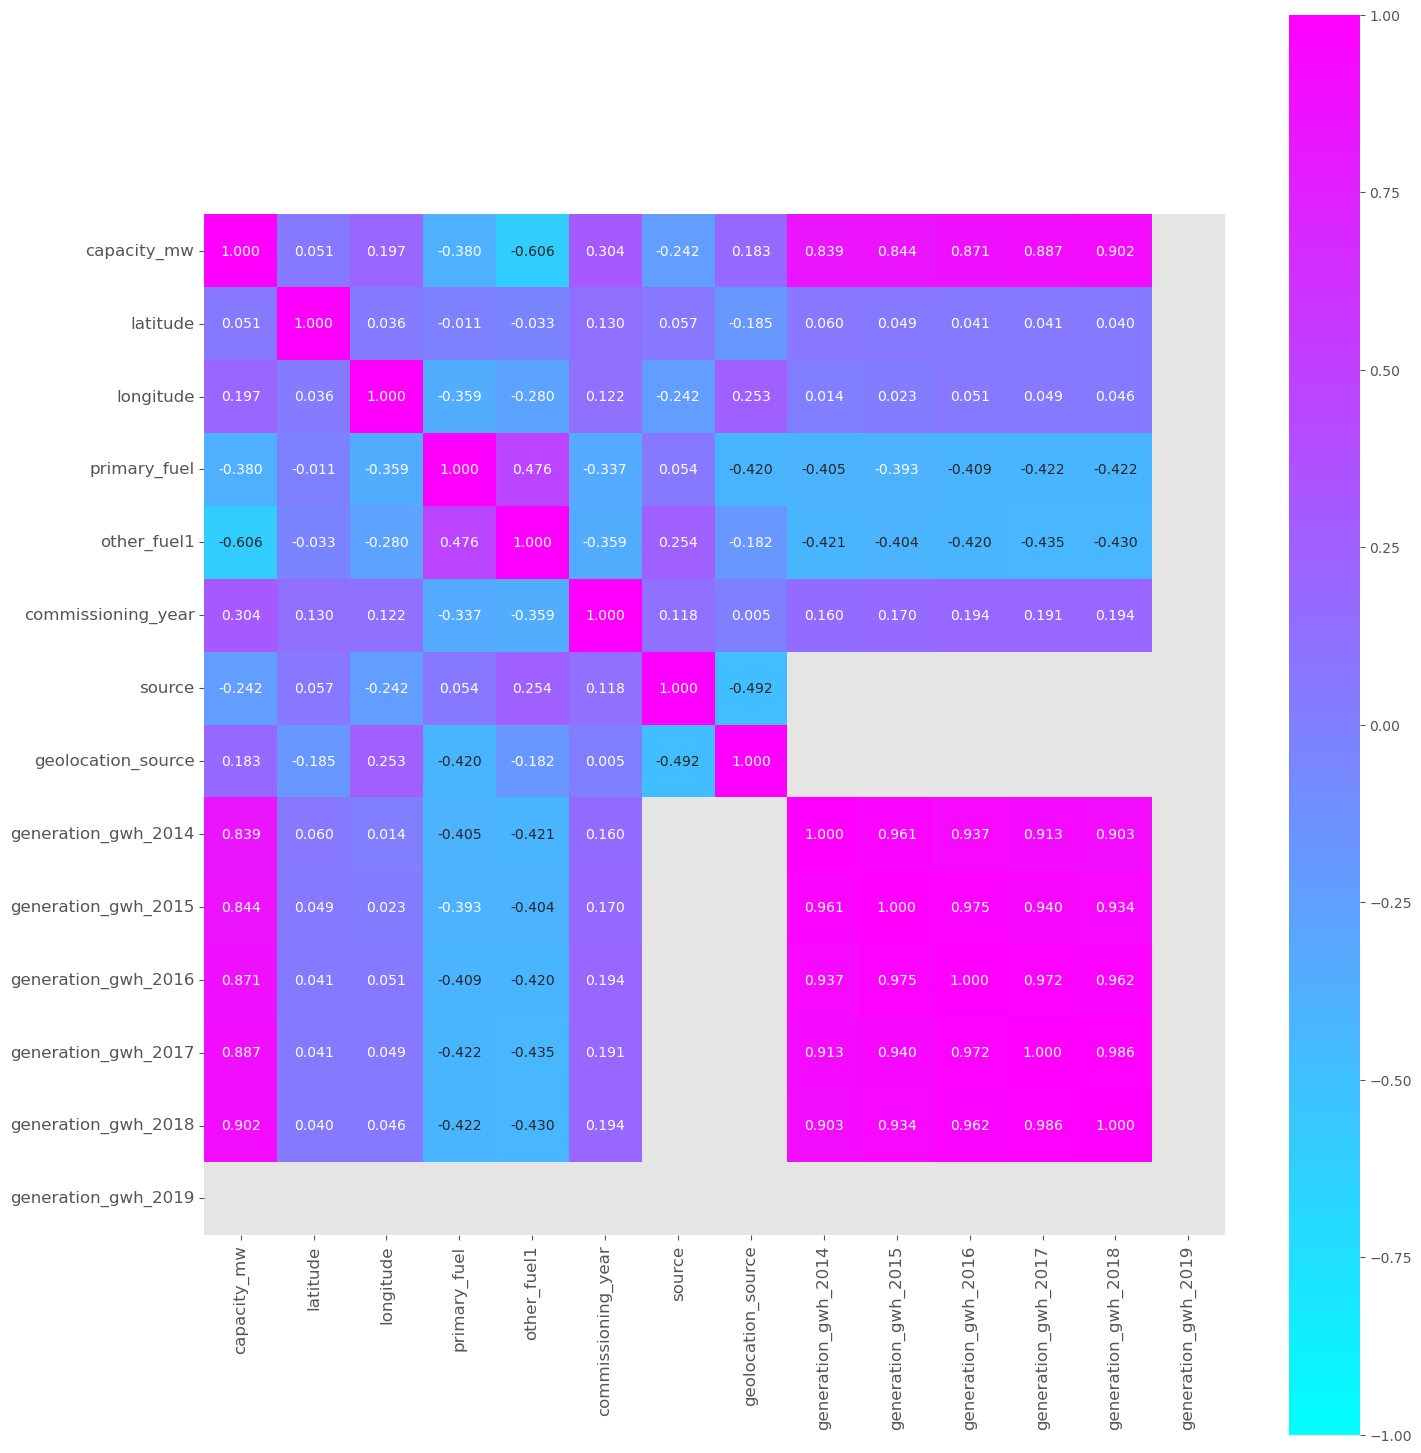

In [52]:

plt.figure(figsize=(15,15))
sns.heatmap(df_pow.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.

capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

# Checking skewness

In [53]:
df_pow.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
primary_fuel           0.472251
other_fuel1           -1.626786
commissioning_year    -1.067949
source                 1.827373
geolocation_source    -1.920302
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

In [54]:
# We will drop other fuel as result of poor correlation and lot of missing values
df_pow.drop("other_fuel1",axis=1,inplace=True)

In [68]:
## Since these have many Nan Values we are dropping these values from dataset

df_pow.drop("generation_gwh_2014",axis=1,inplace=True)
df_pow.drop("generation_gwh_2015",axis=1,inplace=True)
df_pow.drop("generation_gwh_2016",axis=1,inplace=True)
df_pow.drop("generation_gwh_2017",axis=1,inplace=True)


In [69]:
df_pow.drop("generation_gwh_2019",axis=1,inplace=True)

In [78]:
df_pow.drop("generation_gwh_2018",axis=1,inplace=True)

In [88]:
df_pow.drop("commissioning_year",axis=1,inplace=True)

In [89]:
df_pow.sample(10)

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
903,3.00,12.8932,78.1654,6,77,0
367,20.00,26.4970,86.9549,3,22,2
145,3.75,11.4645,76.0376,3,22,2
864,13.50,10.0537,77.5905,3,22,2
521,11.60,16.2365,76.3369,3,22,2
155,21.00,23.2443,70.4603,7,21,2
801,420.00,23.7573,85.8936,1,22,2
164,30.00,18.4271,74.6338,0,31,2
599,30.00,18.2417,74.7531,1,153,2
104,40.00,21.2083,74.1543,7,21,2


# Machine Learning Model for target variable primary fuel

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [117]:
# Splitting data in target and dependent feature
X = df_pow.drop(['primary_fuel'], axis =1)
Y = df_pow['primary_fuel']

In [118]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (634, 5)
Training target vector size: (634,)
Test feature matrix size: (273, 5)
Test target vector size: (273,)


In [103]:
df_pow.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel            int64
source                  int64
geolocation_source      int64
dtype: object

In [120]:
df_pow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            907 non-null    float64
 2   longitude           907 non-null    float64
 3   primary_fuel        907 non-null    int64  
 4   source              907 non-null    int64  
 5   geolocation_source  907 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 42.6 KB


In [112]:
df_pow['latitude'] = df_pow['latitude'].fillna(df_pow['latitude'].mean()) ## We fill the latitude nan values with mean values

In [113]:
df_pow['longitude'] = df_pow['longitude'].fillna(df_pow['longitude'].mean()) ## we fill longitude mean values to Nan

In [114]:
df_pow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            907 non-null    float64
 2   longitude           907 non-null    float64
 3   primary_fuel        907 non-null    int64  
 4   source              907 non-null    int64  
 5   geolocation_source  907 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 42.6 KB


In [115]:
df_pow.sample(5)

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
796,510.0,27.2517,88.4604,3,22,2
777,3.6,23.2414,70.7262,7,21,2
463,6.0,19.2345,73.8144,3,22,2
380,90.0,27.0786,82.0841,1,22,2
80,10.0,21.0813,79.7708,0,179,2


In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7032967032967034


Confusion matrix of Logistics Regression : 
 [[ 7  4  0  1  0  0  0  0]
 [ 1 53  0 16  0  0  0  0]
 [ 3  5  0 11  0  0  0  0]
 [ 0 10  0 55  0  0  0 13]
 [ 0  1  0  1  0  0  0  0]
 [ 2  0  0  5  0  0  0  2]
 [ 0  2  0  0  0  0 50  0]
 [ 0  0  0  4  0  0  0 27]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.71      0.76      0.73        70
           2       0.00      0.00      0.00        19
           3       0.59      0.71      0.64        78
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       1.00      0.96      0.98        52
           7       0.64      0.87      0.74        31

    accuracy                           0.70       273
   macro avg       0.43      0.48      0.46       

In [122]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
svc=SVC()

In [123]:
model=[lg,dtc,knn,gnb,rf,ad,svc]

for m in model:
    m.fit(X_train,Y_train)
    pred=m.predict(X_test)
    print('accuracy_score:',m)
    print(accuracy_score(Y_test,pred))
    print(confusion_matrix(Y_test,pred))
    print(classification_report(Y_test,pred))

accuracy_score: LogisticRegression()
0.7032967032967034
[[ 7  4  0  1  0  0  0  0]
 [ 1 53  0 16  0  0  0  0]
 [ 3  5  0 11  0  0  0  0]
 [ 0 10  0 55  0  0  0 13]
 [ 0  1  0  1  0  0  0  0]
 [ 2  0  0  5  0  0  0  2]
 [ 0  2  0  0  0  0 50  0]
 [ 0  0  0  4  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.71      0.76      0.73        70
           2       0.00      0.00      0.00        19
           3       0.59      0.71      0.64        78
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       1.00      0.96      0.98        52
           7       0.64      0.87      0.74        31

    accuracy                           0.70       273
   macro avg       0.43      0.48      0.46       273
weighted avg       0.64      0.70      0.67       273

accuracy_score: DecisionTreeClassifier()
0.7509157509157509
[[ 5  6  0  0  0

Here Random forest classifier model gives the best accuracy score.

# Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.66483516 0.63736264 0.71270718 0.67955801 0.66298343]
Mean Score : 0.6714892841964665
Std deviation : 0.02467903742453221




Cross Validation Score DecisionTreeClassifier() :

Score : [0.76373626 0.74175824 0.8121547  0.77900552 0.78453039]
Mean Score : 0.7762370226458624
Std deviation : 0.023287675135296938




Cross Validation Score RandomForestClassifier() :

Score : [0.81868132 0.84065934 0.83977901 0.80662983 0.86740331]
Mean Score : 0.8346305628073584
Std deviation : 0.020858212259707878




Again the Random forest classifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [127]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.827 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.772 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.709 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.827 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.795 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [128]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 25}

# Final Model

In [129]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8388278388278388


# Save Model

In [130]:
import joblib
joblib.dump(Final_mod,'powerplantFinal.pkl')

['powerplantFinal.pkl']

# Machine learning models for target variable capacity

In [131]:
# Splitting data in target and dependent feature
X = df_pow.drop(['capacity_mw'], axis =1)
Y = df_pow['capacity_mw']

In [132]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (607, 5)
Training target vector size: (607,)
Test feature matrix size: (300, 5)
Test target vector size: (300,)


In [134]:
df_pow.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.29136497463198274 on Random_state 986


In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 360.50536664829156
Mean squared error : 355097.88291009894
Root Mean Squared Error: 595.9009002427324


 R2 Score :
0.1657644327559441


# Apply on other ML models

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor



In [141]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()

In [142]:
model = [rf,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor() :
Mean absolute error : 252.23065702884574
Mean squared error : 247103.24781385213
Root Mean Squared Error: 497.09480767138587


 R2 Score :
0.4194774792278132


 Error of  DecisionTreeRegressor() :
Mean absolute error : 280.18331333333333
Mean squared error : 294632.19723292
Root Mean Squared Error: 542.8003290648597


 R2 Score :
0.30781716812095006


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 287.6346201438742
Mean squared error : 276543.4080024179
Root Mean Squared Error: 525.8739468755016


 R2 Score :
0.35031337007179797


 Error of  GradientBoostingRegressor() :
Mean absolute error : 262.9650942809565
Mean squared error : 257491.64296194285
Root Mean Squared Error: 507.4363437535223


 R2 Score :
0.39507190224126454


Here the R2 score is high for RandomForest Regressor. So we chosse this model for Prediction on final.

# Cross Validation

In [143]:
model = [rf,dtc,adb,gradb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.40278962921561623


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.08438227358812914


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.34296140131039854


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.44240233864507095


# Hyper Parameter Tuning:GridSearchCV

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [146]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [147]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.246 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.430 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.464 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.360 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.240 total time=   0.1s
[CV 2/5] END criterion=mse, ma

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [148]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

# Final Model

In [149]:
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 262.6168209245337
Mean squared error : 270244.53020105214
Root Mean Squared Error: 519.8504883147193


 R2 Score of Final Model :
0.36511139661185954




 True Values Vs Predicted Value plot :


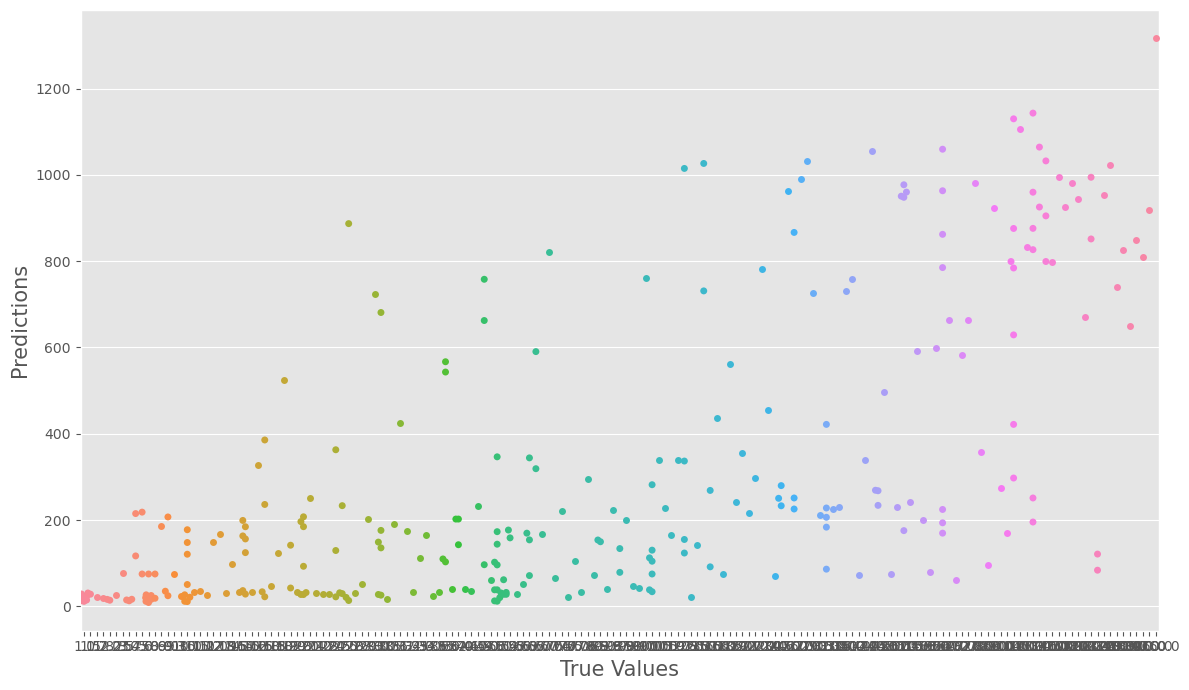

In [150]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Saving model

In [151]:
import joblib
joblib.dump(Final_mod,'PowerplantFinal.pkl')

['PowerplantFinal.pkl']